In [1]:
import json
import matplotlib.pyplot as plt
from Football_Pitch import draw_football_pitch
from textwrap import wrap
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [69]:
match_id = 7562

fin = open("./Statsbomb_Data/events/" + str(match_id) + ".json", 'r')
data = json.load(fin)
fin.close()

print("Example event: ")
data[4]

Example event: 


{'id': 'e3b4ec29-6aa2-4391-a1a4-1ba4bf30fe74',
 'index': 5,
 'period': 1,
 'timestamp': '00:00:01.307',
 'minute': 0,
 'second': 1,
 'type': {'id': 30, 'name': 'Pass'},
 'possession': 2,
 'possession_team': {'id': 784, 'name': 'Peru'},
 'play_pattern': {'id': 9, 'name': 'From Kick Off'},
 'team': {'id': 784, 'name': 'Peru'},
 'player': {'id': 5535, 'name': 'José Paolo Guerrero González'},
 'position': {'id': 23, 'name': 'Center Forward'},
 'location': [60.0, 41.0],
 'duration': 1.013,
 'related_events': ['faaa2ae8-eba1-4f29-b2bf-70bfcec171f0'],
 'pass': {'recipient': {'id': 5523, 'name': 'Renato Fabrizio Tapia Cortijo'},
  'length': 16.03122,
  'angle': -3.0791738,
  'height': {'id': 1, 'name': 'Ground Pass'},
  'end_location': [44.0, 40.0],
  'body_part': {'id': 40, 'name': 'Right Foot'},
  'type': {'id': 65, 'name': 'Kick Off'}}}

In [70]:
teams = [data[1]["possession_team"]["name"], data[1]["team"]["name"]]
shots_that_came_from_throw_ins_indices = []
indices = []

for i in range(len(data)):
    event = data[i]
    if('shot' in event and event["play_pattern"]["id"] == 4):
        shots_that_came_from_throw_ins_indices.append(i)
        
print("There are", len(shots_that_came_from_throw_ins_indices), "shots that came from throw ins.")


There are 4 shots that came from throw ins.


In [73]:
pass_chains = []
for i in shots_that_came_from_throw_ins_indices:
    j = i - 1
    while(j >= 0):
        if("pass" in data[j] and "type" in data[j]["pass"] and data[j]["pass"]["type"]["name"] == "Throw-in"):
            if((data[i]["location"][0] <= 40 and data[j]["pass"]["end_location"][0] <= 40) or \
                (data[j]["pass"]["end_location"][0] >= 80 and data[i]["location"][0] >= 80)):
                pass_chain = []
                
                k = j 
                print(j, i)
                while(k < i):
                    if("pass" in data[k] and data[k]["location"] != data[k]["pass"]["end_location"]):
                        pass_chain.append(["pass", data[k]["location"], data[k]["pass"]["end_location"]])
                    elif("carry" in data[k] and data[k]["location"] != data[k]["carry"]["end_location"]):
                        pass_chain.append(["carry", data[k]["location"], data[k]["carry"]["end_location"]])
                    k += 1
                    
                pass_chain.append({"team": data[j]["possession_team"]["name"], 
                                   "shot_position": data[i]["location"], 
                                   "xG": data[i]["shot"]["statsbomb_xg"], 
                                   "is_goal": (data[i]['shot']['outcome']['name'] == 'Goal')})
                
                pass_chains.append(pass_chain)
            break
        j -= 1
    

print("Example:")
pass_chains

553 574
861 919
2320 2323
Example:


[[['pass', [88.0, 80.0], [81.0, 73.0]],
  ['carry', [81.0, 73.0], [89.0, 76.0]],
  ['pass', [89.0, 76.0], [94.0, 74.0]],
  ['carry', [27.0, 7.0], [29.0, 6.0]],
  ['pass', [29.0, 6.0], [32.0, 9.0]],
  ['carry', [97.0, 69.0], [100.0, 58.0]],
  ['pass', [100.0, 58.0], [103.0, 53.0]],
  ['pass', [103.0, 53.0], [97.0, 46.0]],
  ['carry', [97.0, 46.0], [95.0, 46.0]],
  {'team': 'Australia',
   'shot_position': [95.0, 46.0],
   'xG': 0.04956314,
   'is_goal': False}],
 [['pass', [83.0, 80.0], [105.0, 73.0]],
  ['carry', [105.0, 73.0], [103.0, 73.0]],
  ['carry', [18.0, 8.0], [20.0, 5.0]],
  ['pass', [20.0, 5.0], [39.0, 10.0]],
  ['pass', [82.0, 71.0], [71.0, 65.0]],
  ['pass', [71.0, 65.0], [88.0, 59.0]],
  ['carry', [88.0, 59.0], [82.0, 61.0]],
  ['pass', [82.0, 61.0], [94.0, 17.0]],
  ['carry', [24.0, 66.0], [20.0, 74.0]],
  ['pass', [20.0, 74.0], [7.0, 68.0]],
  ['carry', [7.0, 68.0], [6.0, 69.0]],
  ['pass', [6.0, 69.0], [31.0, 73.0]],
  ['pass', [90.0, 8.0], [88.0, 22.0]],
  ['carry', [8

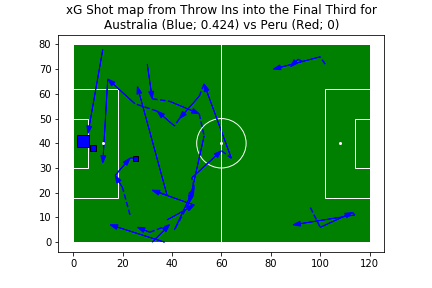

In [72]:
l, w = 120, 80

team_0_xG = 0
team_1_xG = 0

draw_football_pitch(l, w)

for pass_chain in pass_chains:
    t = pass_chain[-1]
    reflect = False
    if(teams[0] == t["team"]):
        reflect = True #reflect about the center spot to adjust for perspective
        team_0_xG += t["xG"]
        shot_marker = 'bs'
        pass_color = 'blue' 
    else:
        team_1_xG += t["xG"]
        shot_marker = 'rs'
        pass_color = 'red' 
    if(t["is_goal"]):
        shot_marker = 'ws'
        
    for i in range(len(pass_chain) - 1):
        if(reflect):
            start = [l - pass_chain[i][1][0], w - pass_chain[i][1][1]]
            end = [l - pass_chain[i][2][0], w - pass_chain[i][2][1]]
        else:
            start = pass_chain[i][1]
            end = pass_chain[i][2]
        if(pass_chain[i][0] == "pass"):
            plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1], \
              color = pass_color, length_includes_head = True, head_width = 2)
        else:
            plt.plot([start[0], end[0]], [start[1], end[1]], linestyle='dashed', color = pass_color)
            
    if(reflect):
        shot_position = [l - t["shot_position"][0], w - t["shot_position"][1]]
    else:
        shot_position = t["shot_position"]
    plt.plot(*shot_position, shot_marker, ms=max(5, t["xG"] * 50), markeredgecolor = "black")
    

team_0_xG, team_1_xG = round(team_0_xG, 3), round(team_1_xG, 3)
plt.axis('scaled')
title = "xG Shot map from Throw Ins into the Final Third for " + teams[0] + " (Blue; " + str(team_0_xG) + ") vs " + teams[1] + " (Red; " + str(team_1_xG) + ")"
plt.title("\n".join(wrap(title, 60)))
plt.show()